# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

613


In [3]:
# Initializing a variable to hold the number of cities per set
div = 50
# Initializing a variable to hold the number of sets within the length of cities
lim = len(cities) // div 
# Initializing a list to hold the lists of cities 
sets = [cities[(i * div):(i * div + div)]
           for i in range(0, lim)] # for i in range(0, 25)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Initializing variables to hold the API URL, units of measure, and the concatinated query_url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# Initializing two variables to hold the initial indices of set and city number
set_num = 1
city_num = 1
# Initializing empty lists to hold each aspect of the climate data for each city
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
# Printing a message that states that data retrieval has begun
print("Beginning Data Retrieval")
print("-----------------------------")
# Looping through the cities within each set and querying the API for the climate data for each city
for set in sets:
    for city in set:
        # Using an exception to handle cases where climate data may not exist for a given city
        try:
            # Initializing a variable to hold the dict object generated by the API query
            city_response = requests.get(query_url + city).json()
            # Appending each individual climate data list with the related data from the API query
            city_name.append(city_response["name"])
            cloudiness.append(city_response["clouds"]["all"])
            country.append(city_response["sys"]["country"])
            date.append(city_response["dt"])
            humidity.append(city_response["main"]["humidity"])
            lat.append(city_response["coord"]["lat"])
            lng.append(city_response["coord"]["lon"])
            max_temp.append(city_response["main"]["temp_max"])
            wind_speed.append(city_response["wind"]["speed"])
            print(f"Processing Record {city_num} for Set {set_num} | {city.title()}")
            # Incrementing city_num by 1 for the next city in the set
            
        # Handling the excpetion by printing a message saying that the city wasn't found
        except (KeyError):
            print("City not found. Skipping...")
        # Incrementing the set_num by 1 for the next set
        city_num += 1
    # Incremeneting city_num back to 1, and set_num by 1 once the end of each set has been reached  
    city_num = 1    
    set_num += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 for Set 1 | Ushuaia
Processing Record 2 for Set 1 | Butaritari
Processing Record 3 for Set 1 | Puerto Ayacucho
Processing Record 4 for Set 1 | Vaini
Processing Record 5 for Set 1 | Ancud
Processing Record 6 for Set 1 | Albany
Processing Record 7 for Set 1 | Neyshabur
Processing Record 8 for Set 1 | Mataura
Processing Record 9 for Set 1 | Vieste
Processing Record 10 for Set 1 | Ponta Do Sol
Processing Record 11 for Set 1 | Rikitea
Processing Record 12 for Set 1 | Cape Town
Processing Record 13 for Set 1 | Hithadhoo
Processing Record 14 for Set 1 | San Cristobal
Processing Record 15 for Set 1 | Menongue
Processing Record 16 for Set 1 | Lompoc
Processing Record 17 for Set 1 | Suamico
Processing Record 18 for Set 1 | Kapaa
Processing Record 19 for Set 1 | Saint-Francois
Processing Record 20 for Set 1 | Plana
Processing Record 21 for Set 1 | Hamilton
Processing Record 22 for Set 1 | Kodiak
Processing Record 23 for Se

Processing Record 1 for Set 5 | Mount Gambier
Processing Record 2 for Set 5 | Oksovskiy
Processing Record 3 for Set 5 | Flinders
Processing Record 4 for Set 5 | Werda
Processing Record 5 for Set 5 | Paicandu
Processing Record 6 for Set 5 | Dawson Creek
Processing Record 7 for Set 5 | Olean
Processing Record 8 for Set 5 | Geraldton
Processing Record 9 for Set 5 | Okmulgee
Processing Record 10 for Set 5 | Rio Grande
Processing Record 11 for Set 5 | Alyangula
Processing Record 12 for Set 5 | Airai
Processing Record 13 for Set 5 | Ponferrada
Processing Record 14 for Set 5 | Muros
Processing Record 15 for Set 5 | Gonzalez
Processing Record 16 for Set 5 | Vostok
City not found. Skipping...
Processing Record 18 for Set 5 | Yulara
Processing Record 19 for Set 5 | Norton Shores
Processing Record 20 for Set 5 | Eten
Processing Record 21 for Set 5 | Kavaratti
Processing Record 22 for Set 5 | Sao Joao Da Barra
Processing Record 23 for Set 5 | Goure
Processing Record 24 for Set 5 | Beyneu
Processin

City not found. Skipping...
Processing Record 7 for Set 9 | Kamien Pomorski
Processing Record 8 for Set 9 | Mahajanga
City not found. Skipping...
Processing Record 10 for Set 9 | Guozhen
Processing Record 11 for Set 9 | Dromolaxia
Processing Record 12 for Set 9 | Samarai
City not found. Skipping...
Processing Record 14 for Set 9 | Morristown
Processing Record 15 for Set 9 | Ust-Omchug
Processing Record 16 for Set 9 | Port Hardy
Processing Record 17 for Set 9 | Quatre Cocos
Processing Record 18 for Set 9 | Port Elizabeth
Processing Record 19 for Set 9 | Half Moon Bay
Processing Record 20 for Set 9 | Khani
Processing Record 21 for Set 9 | Ardakan
Processing Record 22 for Set 9 | Fairbanks
Processing Record 23 for Set 9 | Tuatapere
Processing Record 24 for Set 9 | Bonavista
Processing Record 25 for Set 9 | Comodoro Rivadavia
Processing Record 26 for Set 9 | Chatakonda
Processing Record 27 for Set 9 | Timra
Processing Record 28 for Set 9 | Wilmington
Processing Record 29 for Set 9 | Souill

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Initalizing a DataFrame with the query results from each city
city_climate_df = pd.DataFrame({"City": city_name,
                                "Country": country,
                                "Latitude": lat,
                                "Longitude": lng,
                                "Max Temp (C)": max_temp,
                                "Humidity (%)": humidity,
                                "Wind Speed (m/s)": wind_speed,
                                "Cloudiness (%)": cloudiness,
                                "Date": date,})
# Displaying city_climate_df
city_climate_df.head()

,City,Country,Latitude,Longitude,Max Temp (C),Humidity (%),Wind Speed (m/s),Cloudiness (%),Date
0,Ushuaia,AR,-54.81,-68.31,2.0,93,4.10,90,1562043488
1,Butaritari,KI,3.07,172.79,29.5,69,3.55,86,1562043488
2,Puerto Ayacucho,CO,5.66,-67.63,23.7,93,3.00,100,1562043488
3,Vaini,IN,15.34,74.49,29.1,71,4.28,100,1562043488
4,Ancud,CL,-41.87,-73.83,2.0,78,2.60,40,1562043489


In [7]:
# Export city_climate_df as a .csv file
export_csv = city_climate_df.to_csv("cities_climate_data.csv", index=True, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
# Using time.strftime to calculatet the date of the lastet climate data measurement taken for all of the cities in the
# cities_climate_df and initializing a varaible with it so it can be used in the titles of the following plots
latest_date = time.strftime("%m/%d/%Y", time.localtime(city_climate_df["Date"].max()))

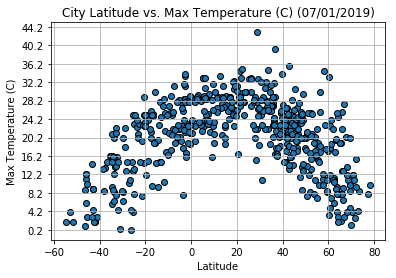

In [9]:
# Creating a figure and a subplot
fig, ax = plt.subplots()
# Initializing variables that will hold the x and y values to be plotted, and then plotting them
x_data = city_climate_df["Latitude"]
y_data = city_climate_df["Max Temp (C)"]
ax.scatter(x_data, y_data, edgecolor="black")
# Setting the y-ticks, their labels, and applying a grid to the plot
ax.set_yticks(np.arange(y_data.min(), y_data.max() + 4, 4))
ax.set_yticklabels(np.arange(y_data.min(), y_data.max() + 4, 4))
ax.grid()
# Settin the figure title and the x and y-axis labels
ax.set_title(f"City Latitude vs. Max Temperature (C) ({latest_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (C)")
# Displaying the figure
plt.show()

#### Latitude vs. Humidity Plot

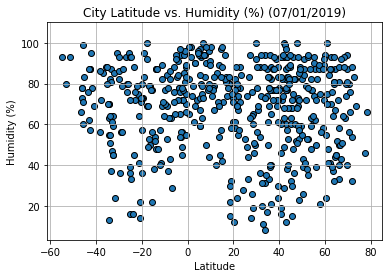

In [10]:
# Creating a figure and a subplot
fig, ax = plt.subplots()
# Initializing variables that will hold the x and y values to be plotted, and then plotting them
x_data = city_climate_df["Latitude"]
y_data = city_climate_df["Humidity (%)"]
ax.scatter(x_data, y_data, edgecolor="black")
# Setting the upper y-axis limit and applying a grid to the figure
ax.set_ylim(top=110)
ax.grid()
# Settin the figure title and the x and y-axis labels
ax.set_title(f"City Latitude vs. Humidity (%) ({latest_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
# Displaying the figure
plt.show()

#### Latitude vs. Cloudiness Plot

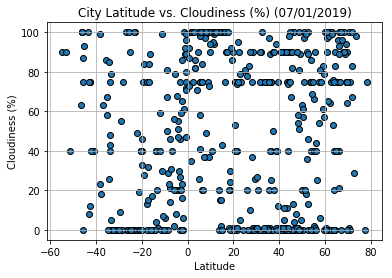

In [11]:
# Creating a figure and a subplot
fig, ax = plt.subplots()
# Initializing variables that will hold the x and y values to be plotted, and then plotting them
x_data = city_climate_df["Latitude"]
y_data = city_climate_df["Cloudiness (%)"]
ax.scatter(x_data, y_data, edgecolor="black")
# Applying a grid to the figure
ax.grid()
# Settin the figure title and the x and y-axis labels
ax.set_title(f"City Latitude vs. Cloudiness (%) ({latest_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
# Displaying the figure
plt.show()

#### Latitude vs. Wind Speed Plot

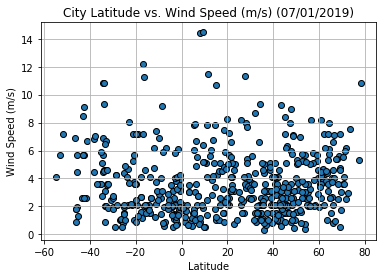

In [12]:
# Creating a figure and a subplot
fig, ax = plt.subplots()
# Initializing variables that will hold the x and y values to be plotted, and then plotting them
x_data = city_climate_df["Latitude"]
y_data = city_climate_df["Wind Speed (m/s)"]
ax.scatter(x_data, y_data, edgecolor="black")
# Applying a grid to the figure
ax.grid()
# Settin the figure title and the x and y-axis labels
ax.set_title(f"City Latitude vs. Wind Speed (m/s) ({latest_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
# Displaying the figure
plt.show()

## Analysis of Climate Data From Cities Around The World

Three trends I observed during the analysis of the collected climate data are that:

1. Temperatures are highest at the equator and decrease as latitude increases towards the poles.


2. Humidity is the lowest around 30 degrees latitude in both the northern and southern hemispheres. This is consistent with these being the latitudes around which most of the worlds deserts exist due to the subsidence of cool, dry air from the downward legs of the Hadley Cells in either hemisphere. 


3. The equatorial and sub-equatorial regions of the world appear to be cloudier than other regions of the world. This is consistent with these regions being generally wetter that other regions of the world and therefore being able to fuel more evaporation and evapotransiration to the atmosphere which will eventually result in precipitation in the form of clouds.